In [1]:
import pandas as pd
import numpy as np 
from pylab import plt
df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [2]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

Text(0, 0.5, 'Snow_depth (cm)')

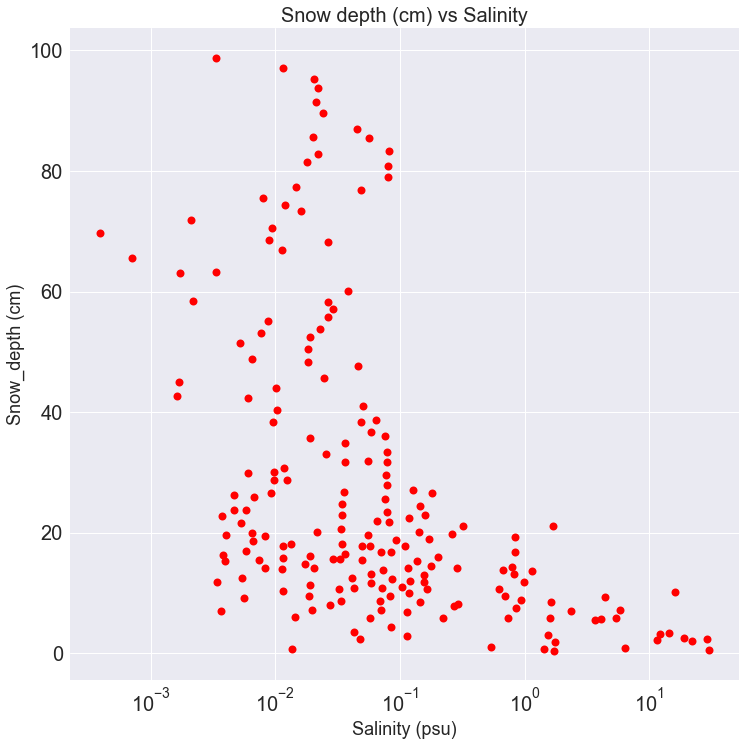

In [43]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(salinity,snow_depth,'r.',markersize = 16)
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (cm) vs Salinity',fontsize = 20)
plt.xlabel('Salinity (psu)',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)

Text(0.5, 1.0, 'Snow depth vs salinity')

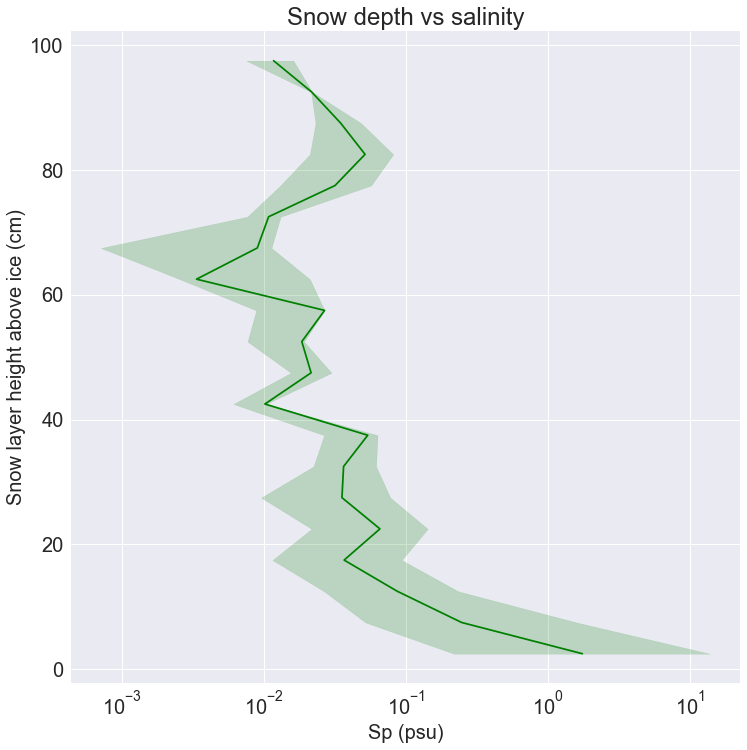

In [4]:
bins = np.arange(0,101,5);

salinity_50 = []
salinity_25 = []
salinity_75 = []
depth       = []


for i in range(len(bins)-1):
    
    cond = (snow_depth>bins[i]) & (snow_depth<bins[i+1]);
    salinity_slice = salinity[cond];
    salinity_50 = np.append(salinity_50, np.percentile(salinity_slice,50));
    salinity_25 = np.append(salinity_25, np.percentile(salinity_slice,25));
    salinity_75 = np.append(salinity_75, np.percentile(salinity_slice,75));
    depth = np.append(depth,(bins[i]+bins[i+1])/2)
    
plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)

In [ ]:
# plot the salinity distribution for each snow depth bin 







Text(0.5, 1.0, 'Snow depth vs salinity')

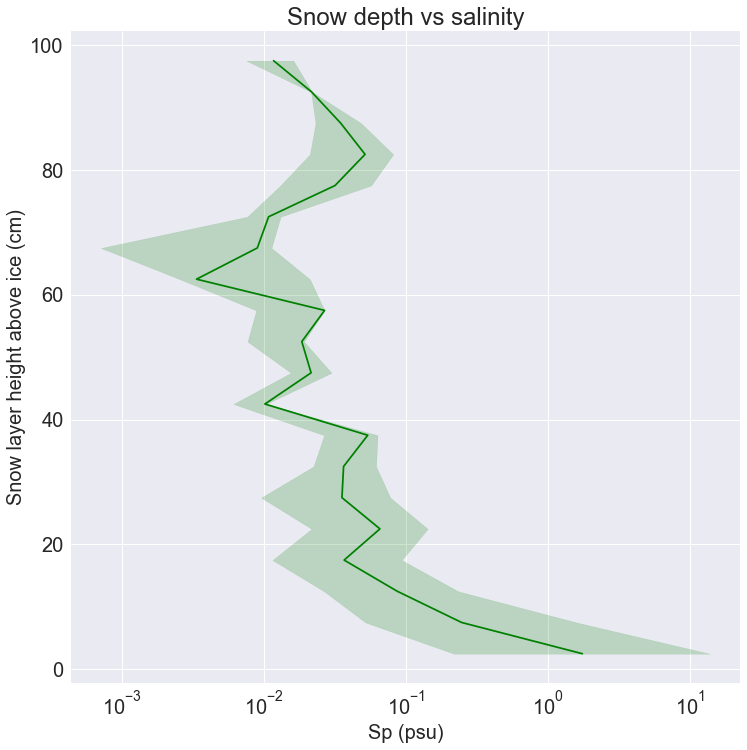

In [27]:
# fitting a polynomial function to the above curve 


parabolic_fit = np.polyfit(salinity_50,depth,1) 

Y_fit = np.polyval(parabolic_fit,salinity_50)

plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)
#plt.plot(salinity_50,Y_fit,'k-.',markersize = 5)


#test = np.polyval(parabolic_fit,100)

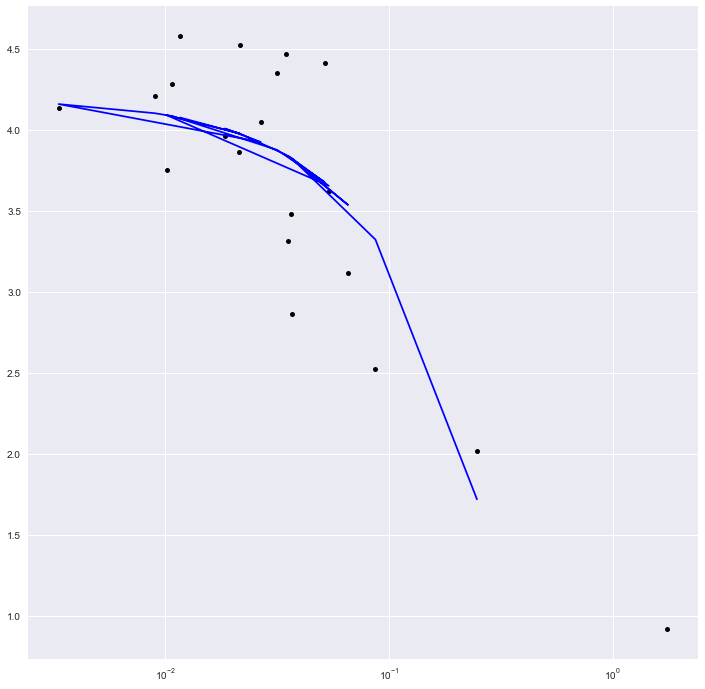

In [40]:
plt.figure(figsize = (12,12))
X = np.log(salinity_50)
Y = np.log(depth)
plt.plot(salinity_50,Y,'k.',markersize = 10)
#plt.plot(X,depth,'k.',markersize = 10)
plt.xscale('log')

fit_1 = np.polyfit(salinity_50[1:],Y[1:],1)

fit_1_val = np.polyval(fit_1,salinity_50[1:])
plt.plot(salinity_50[1:],fit_1_val,'b-')



In [39]:
salinity_50

array([1.75242446, 0.24701829, 0.08685114, 0.03662482, 0.06551286,
       0.03535651, 0.03630495, 0.05374684, 0.01011817, 0.02142062,
       0.0184207 , 0.02666984, 0.00333395, 0.00894398, 0.01074873,
       0.03160161, 0.05145517, 0.03462165, 0.02158992, 0.01165002])

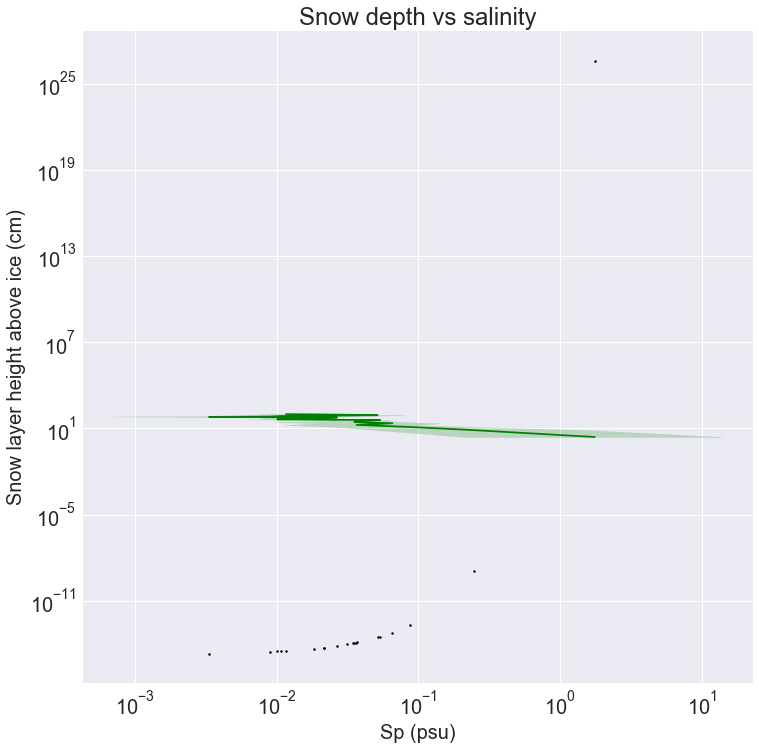

In [13]:
# fitting a polynomial function to the above curve 

Y = np.log(depth)

linear_fit = np.polyfit(salinity_50,depth,1)


a = np.exp(linear_fit[0])
b = linear_fit[1]

Y_fit = a*np.exp(b*salinity_50);
#Y_fit = np.polyval(parabolic_fit,salinity)

plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)
plt.plot(salinity_50,Y_fit,'k.',markersize = 5)
plt.yscale('log')

In [21]:
depth

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

In [11]:
linear_fit

array([-34.01180068,  54.36101726])

In [8]:
lat = df.lat
lon = df.lon

sd_50 = [];
sd_25 = [];
sd_75 = [];
salinity_median = [];
salinity_25 = [];
salinity_75 = [];
snow_depth_bin = np.arange(0,81,5);

salinity = df.salinity
salinity_copy = salinity.copy()
snow_bottom = df.top

salinity_2 = salinity[salinity>0]
snow_bottom_2 = snow_bottom[salinity>0]
#figure(1)
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(salinity_2,snow_bottom_2,'b.',markersize=20)
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Salinity (%)',fontsize = 20)
plt.ylabel('Sample Bottom depth (cm)',fontsize = 20)
plt.grid(True)
#plt.show()

plt.figure(2)

for i in range(len(snow_depth_bin)-1):
    
    cond = (snow_bottom_2>snow_depth_bin[i]) & (snow_bottom_2<snow_depth_bin[i+1])
    
    salinity_slice = salinity_2[cond]
    if len(salinity_slice) >0:
        print('the iteration number and length of salinity slice= ', i, len(salinity_slice))
        z = np.percentile(salinity_slice,50)
        
        salinity_median = np.append(salinity_median, np.percentile(salinity_slice,50))
        snow_bottom_slice = snow_bottom_2[cond]
        sd_50 = np.append(sd_50,np.percentile(snow_bottom_slice,50))

        sd_25 = np.append(sd_25,np.percentile(snow_bottom_slice,25))
        sd_75 = np.append(sd_75,np.percentile(snow_bottom_slice,75))

        salinity_25 = np.append(salinity_25, np.percentile(salinity_slice,25))
        salinity_75 = np.append(salinity_75, np.percentile(salinity_slice,75))
        


AttributeError: 'DataFrame' object has no attribute 'lat'

In [ ]:
plt.plot(salinity_median,sd_50,'r.',markersize = 20)

#plt.plot(salinity_median,)
#plt.xscale('log')

In [ ]:
test = salinity_copy[salinity_copy>0]
np.min(test)

In [ ]:
plt.plot(salinity,snow_bottom,'r*')
plt.xscale('log')

In [ ]:
salinity_slice

In [ ]:
a = np.array([1,2,3,4,4,4,5,6])
cond = (a!=4) & (a==5)
a[cond]


In [ ]:
salinity

In [ ]:
np.mean(salinity)

In [ ]:
salinity

In [ ]:
np.shape(salinity)

In [ ]:
salinity[4]

In [ ]:
salinity = df.salinity

In [ ]:
np.min(salinity)

In [ ]:
np.mean(salinity)